## Housing data 컬럼 정보
[01]  CRIM 자치시(town) 별 1인당 범죄율  
[02]  ZN 25,000 평방피트를 초과하는 거주지역의 비율  
[03]  INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
[04]  CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
[05]  NOX 10ppm 당 농축 일산화질소  
[06]  RM 주택 1가구당 평균 방의 개수  
[07]  AGE 1940년 이전에 건축된 소유주택의 비율  
[08]  DIS 5개의 보스턴 직업센터까지의 접근성 지수  
[09]  RAD 방사형 도로까지의 접근성 지수  
[10]  TAX 10,000 달러 당 재산세율  
[11]  PTRATIO 자치시(town)별 학생/교사 비율  
[12]  B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.  
[13]  LSTAT 모집단의 하위계층의 비율(%)  
[14]  MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [11]:
df = pd.read_csv("../data/housing.data", header=None, sep="\s+")
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


## 탐색적 데이터 분석(EDA - Exploratory Data Analysis), 
- 피어슨 상관계수를 이용해서 상관관계를 쉽게 파악 가능

C:\Users\ynebu\Anaconda3\envs\test\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


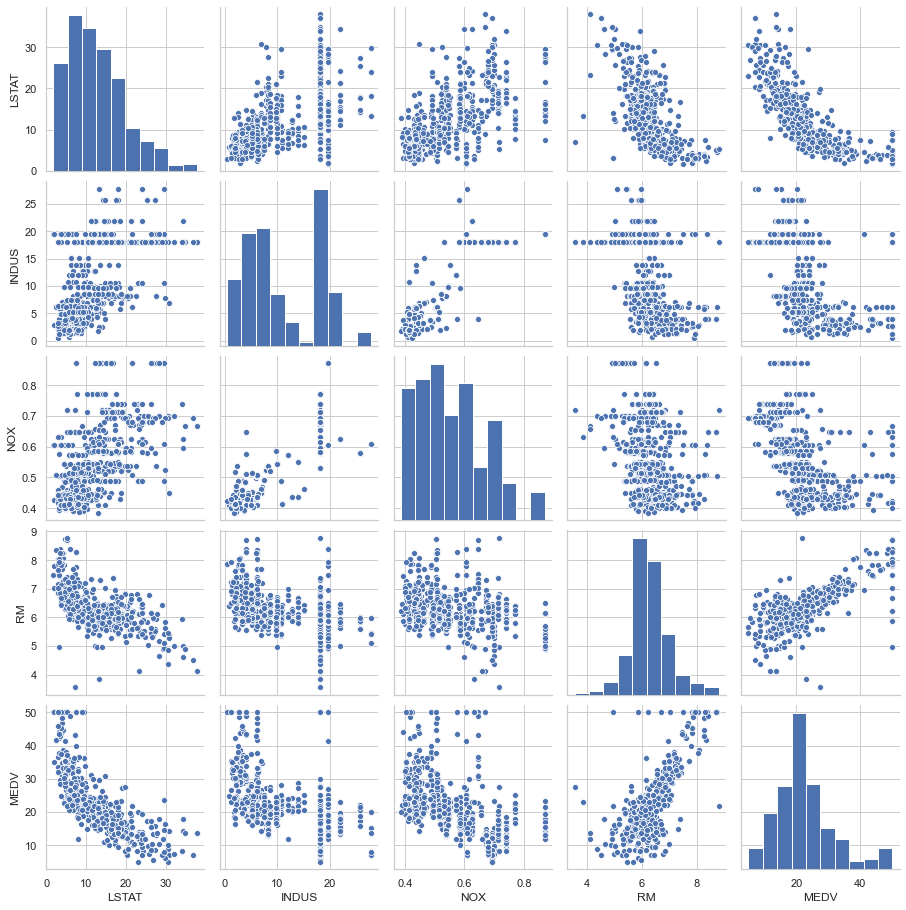

In [21]:
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.show()
sns.reset_orig() # matplotlib 스타일로 복귀

## 히트맵 + 정량적 상관관계

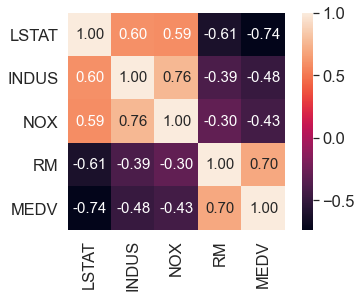

In [22]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
plt.show()

방의갯수(RM)과 주택가격(MEDV)이 0.7로 매우 강한 양의 상관계수임을 표현

In [23]:
type(df["RM"].values)

numpy.ndarray

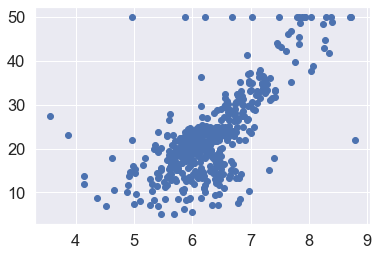

In [24]:
#X = df[["RM"]].values
X = df["RM"].values.reshape(-1,1) # 2 dimension
y = df["MEDV"].values
plt.plot(X, y, 'o')
plt.show()

In [25]:
model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print('회귀선 기울기: %.3f\n절편: %.3f' %(slope, intercept))

회귀선 기울기: 9.102
절편: -34.671


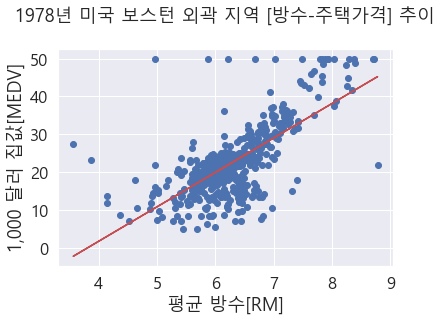

In [50]:
y_predict = model.predict(X)

plt.rc('font', family='Malgun Gothic') #한글 폰트 설정
plt.scatter(X, y, color='b', marker='o', label='정답 데이터') # 정답 데이터
plt.plot(X, y_predict, c='r', label='예측 데이터')  # 예측 데이터
  
plt.title('1978년 미국 보스턴 외곽 지역 [방수-주택가격] 추이\n')
plt.xlabel('평균 방수[RM]')
plt.ylabel('1,000 달러 집값[MEDV]')
plt.show()

## Predict

In [27]:
num_rooms = 5.0
X_test = np.array(num_rooms, dtype=float).reshape(-1, 1)
housing_val = model.predict(X_test)
X_test.shape

(1, 1)

In [28]:
print('방이 [%d]개인 주택 가격은 약 [%f]달러 입니다.' %(num_rooms, housing_val*1000))

방이 [5]개인 주택 가격은 약 [10839.924129]달러 입니다.
